In [22]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2
import pandas as pd

##### Intersection of words in PND (Plan Nacional de Desarrollo) 2019 and PND 2025

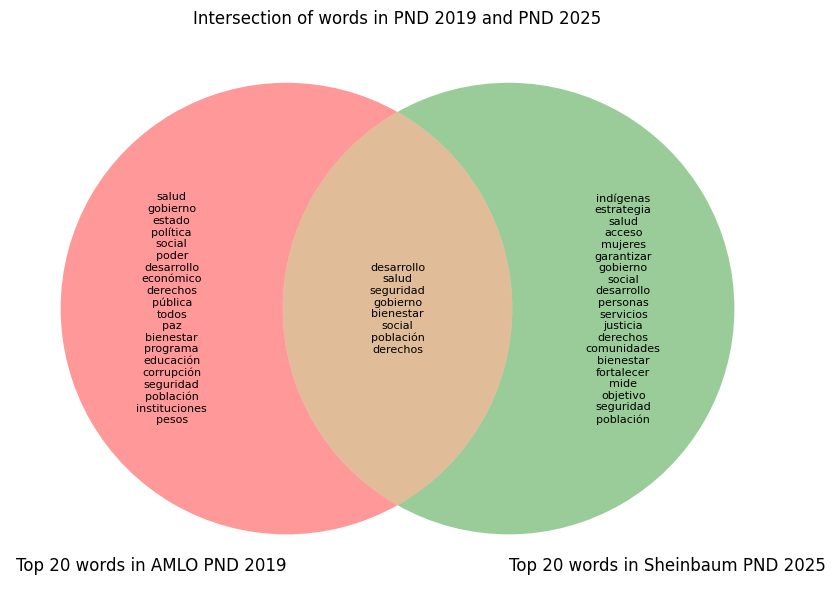

In [31]:

#read files CSV
df_amlo_top = pd.read_csv("results/words_top_AMLO.csv")
df_she_top = pd.read_csv("results/words_top_SHE.csv")
#Convert to minus letters
df_she_top["SheWords"] = df_she_top["SheWords"].str.lower()
df_amlo_top["AMLOWords"] = df_amlo_top["AMLOWords"].str.lower()
#Remove numbers of words
df_amlo_top['AMLOWords'] = df_amlo_top['AMLOWords'].str.replace(r'^\d+\.\s*', '', regex=True)
df_she_top['SheWords'] = df_she_top['SheWords'].str.replace(r'^\d+\.\s*', '', regex=True)

# convert to set
words_amlo = set(df_amlo_top["AMLOWords"])
words_she = set(df_she_top["SheWords"])
# Define  two groups

# Palabras coincidentes y excluyentes
common_words = words_amlo.intersection(words_she)
only_amlo =words_amlo - words_she
only_she = words_she - words_amlo

# adjust the size of the figure
plt.figure(figsize=(10, 8))  # Cambia los valores de width y height según lo necesites


# Crear el diagrama de Venn
venn = venn2([words_amlo, words_she], set_labels=("Top 20 words in AMLO PND 2019", "Top 20 words in Sheinbaum PND 2025"))

# Personalizar las etiquetas de los subconjuntos
venn.get_label_by_id('10').set_text('\n'.join(words_amlo))  # Solo en AMLO
venn.get_label_by_id('01').set_text('\n'.join(words_she))   # Solo en Sheinbaum
venn.get_label_by_id('11').set_text('\n'.join(common_words))  # Comunes

venn.get_label_by_id('10').set_fontsize(8)
venn.get_label_by_id('01').set_fontsize(8)
venn.get_label_by_id('11').set_fontsize(8)

# Add title
plt.title("Intersection of words in PND 2019 and PND 2025")
plt.show()
